In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
# Load the model
model_path = "./tflite/saved_model"  # Update with your model path
detect_fn = tf.saved_model.load(model_path)

(-0.5, 859.5, 1901.5, -0.5)

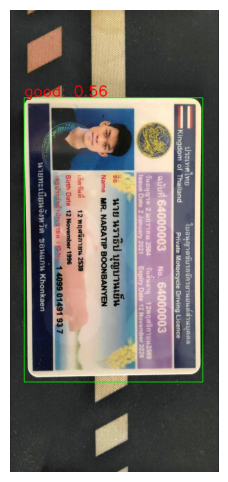

In [9]:
category_index = {1:'good', 2:'bad'}

# Load and preprocess an image
image_path = "68407.jpg"
image_np = cv2.imread(image_path)
image_np = cv2.cvtColor(image_np, cv2.COLOR_BGR2RGB)

# Convert image to tensor
input_tensor = tf.convert_to_tensor(image_np)
input_tensor = input_tensor[tf.newaxis, ...]  # Add batch dimension

# Run inference
detections = detect_fn(input_tensor)

# Extract results
num_detections = int(detections.pop('num_detections'))
detection_boxes = detections['detection_boxes'][0].numpy()
detection_classes = detections['detection_classes'][0].numpy().astype(np.int32)
detection_scores = detections['detection_scores'][0].numpy()

# Draw bounding boxes
for i in range(num_detections):
    if detection_scores[i] > 0.55:  # Confidence threshold
        h, w, _ = image_np.shape
        y_min, x_min, y_max, x_max = detection_boxes[i]
        x_min, x_max, y_min, y_max = int(x_min * w), int(x_max * w), int(y_min * h), int(y_max * h)
        cv2.rectangle(image_np, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        
        
        class_label = category_index.get(detection_classes[i], f"Class {detection_classes[i]}")
        label = f"{class_label}: {detection_scores[i]:.2f}"
        # text_size = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 2, 1)[0]
        text_x, text_y = x_min, y_min - 5
        cv2.putText(image_np, label, (text_x, text_y - 2), cv2.FONT_HERSHEY_SIMPLEX, 2, (255, 0, 0), 3)

fig, ax = plt.subplots(figsize=(8, 6))
ax.imshow(image_np)
ax.axis('off')  # Optional: Hide axes
# plt.show()
